In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
tokenizer = Tokenizer()

data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

corpus = data.lower().split('\n')

tokenizer.fit_on_texts(corpus)
word_index = tokenizer.word_index

total_words=len(word_index) + 1


In [3]:
print(word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

遍历每个句子，每个句子进行切分形成列表，后面将统一尺寸，在进行学习生成

In [4]:
input_sequences = []  # 用来放置切分的所有句子

for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
        n_gram_sequences = token_list[:i+1]
        input_sequences.append(n_gram_sequences)

进行统一尺寸

In [5]:
import numpy as np

max_sequence_len = max([len(i) for i in input_sequences])
# padded_input = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre'))
padded_input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_len,padding='pre')

In [6]:
padded_input_sequences

array([[  0,   0,   0, ...,   0,   4,   2],
       [  0,   0,   0, ...,   4,   2,  66],
       [  0,   0,   0, ...,   2,  66,   8],
       ...,
       [  0,   0,   0, ...,  60, 262,  13],
       [  0,   0,   0, ..., 262,  13,   9],
       [  0,   0,   0, ...,  13,   9,  10]])

创建预测器和标签(最后一个词将作为标签)

In [7]:
# 进行array切片操作，xs为出最后一列，label为最后一列
xs,labels = padded_input_sequences[:,:-1],padded_input_sequences[:,-1]

In [8]:
labels.shape

(453,)

In [9]:
total_words

263

In [10]:
# 将类向量（整数）转换为二进制类矩阵。 形成独热编码
ys = tf.keras.utils.to_categorical(labels,num_classes=total_words)

In [11]:
?tf.keras.utils.to_categorical

Signature: tf.keras.utils.to_categorical(y, num_classes=None, dtype='float32')
Docstring:
Converts a class vector (integers) to binary class matrix.

E.g. for use with categorical_crossentropy.

Arguments:
    y: class vector to be converted into a matrix
        (integers from 0 to num_classes).
    num_classes: total number of classes.
    dtype: The data type expected by the input. Default: `'float32'`.

Returns:
    A binary matrix representation of the input. The classes axis is placed
    last.
File:      c:\users\wx847\anaconda3\envs\learn_tensorflow\lib\site-packages\tensorflow_core\python\keras\utils\np_utils.py
Type:      function


看看各词语的频数

In [12]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [13]:
print(padded_input_sequences[6])  # 第7个句子

[ 0  0  0  4  2 66  8 67 68 69 70]


In [14]:
print(xs[6])  # 第7个句子，除最后一个词（70）

[ 0  0  0  4  2 66  8 67 68 69]


In [15]:
print(ys[6])  # 第7个词语的最后一个词，即标签 70

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
import numpy as np

print(np.argmax(ys[6]))

70


创建模型

In [17]:
model = tf.keras.Sequential()
# 增加嵌入层
model.add(tf.keras.layers.Embedding(total_words,64,input_length=max_sequence_len-1))
# 增加双向的LSTM层，20为输出形状
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
# 增加隐层 激活函数为softmax
model.add(tf.keras.layers.Dense(total_words,activation='softmax'))
# 进行编译
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(xs,ys,epochs=500,verbose=1)



Train on 453 samples
Epoch 1/500
453/453 [==============================] - 4s 8ms/sample - loss: 5.5696 - accuracy: 0.0265
Epoch 2/500
453/453 [==============================] - 0s 227us/sample - loss: 5.5466 - accuracy: 0.0773
Epoch 3/500
453/453 [==============================] - 0s 220us/sample - loss: 5.5011 - accuracy: 0.0552
Epoch 4/500
453/453 [==============================] - 0s 218us/sample - loss: 5.3743 - accuracy: 0.0574
Epoch 5/500
453/453 [==============================] - 0s 214us/sample - loss: 5.1714 - accuracy: 0.0508
Epoch 6/500
453/453 [==============================] - 0s 216us/sample - loss: 5.0768 - accuracy: 0.0552
Epoch 7/500
453/453 [==============================] - 0s 209us/sample - loss: 5.0404 - accuracy: 0.0662
Epoch 8/500
453/453 [==============================] - 0s 319us/sample - loss: 5.0119 - accuracy: 0.0596
Epoch 9/500
453/453 [==============================] - 0s 266us/sample - loss: 4.9830 - accuracy: 0.0574
Epoch 10/500
453/453 [==============

In [20]:
model.save('歌词生成.h5')

In [18]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

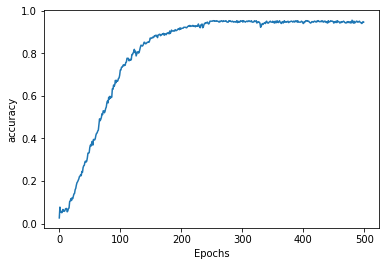

In [19]:
plot_graphs(history, 'accuracy')

开始进行歌词生成

In [30]:
seed_text = "Laurence went to dublin"  # 开始的语句
next_words = 100

reverse_word_index = {v:k for k,v in tokenizer.word_index.items()}


for _ in range(next_words):
    new_token_list = tokenizer.texts_to_sequences([seed_text])[0]
    new_padded_token_list = pad_sequences([new_token_list], maxlen=max_sequence_len-1,padding='pre')
    # 如predicted是一个array([185])
    predicted = model.predict_classes(new_padded_token_list,verbose=0)
    # output_words = ''
    # # 第一种 每次遍历，无意义
    # for word, index in tokenizer.word_index.items():
    #     还有错误，predicted是一个array([185])  每次对比都是[True] 或者[False] 作为判断条件不规范
    #     if index == predicted:
    #         output_word = word
    #         break
    # 第二种改编版，将索引制成键直接取
    ss = int(predicted)
    output_word = reverse_word_index[ss]
    seed_text += ' ' + output_word

print(seed_text)


Laurence went to dublin his leg through miss finnertys hoops academy hoops hoops together new steps for lanigans ball ball ball twas ask invitation invitation glisten glisten mchugh put i suppose suppose tea stepped i them wall wall merry in all ball of a of one satisfaction long new new steps for lanigans ball ball ball of fainted there was mchugh strangled mchugh odaly hearty hearty i mchugh put tipped round a rose rose jig call cask a rose further glisten strangled strangled put i forget hoops strangled hoops cask cask a rose rose rose rose put me tea tea a jig rose strangled


In [29]:
import numpy as np

help(np.array)

Help on built-in function array in module numpy:

array(...)
    array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)
    
    Create an array.
    
    Parameters
    ----------
    object : array_like
        An array, any object exposing the array interface, an object whose
        __array__ method returns an array, or any (nested) sequence.
    dtype : data-type, optional
        The desired data-type for the array.  If not given, then the type will
        be determined as the minimum type required to hold the objects in the
        sequence.
    copy : bool, optional
        If true (default), then the object is copied.  Otherwise, a copy will
        only be made if __array__ returns a copy, if obj is a nested sequence,
        or if a copy is needed to satisfy any of the other requirements
        (`dtype`, `order`, etc.).
    order : {'K', 'A', 'C', 'F'}, optional
        Specify the memory layout of the array. If object is not an array, the
        newly crea